# GitUp

In [ ]:
!git add .
!git commit -m "EIA to ds2"
!git push

# Imports

In [1]:
# Libraries
from datashop import *
from eia_classes import *
import requests
import sqlite3
import pprint as pp
import pdb

# Classes

In [2]:
desc = ''
daily_price = EIA_Series('Daily Price','PET.RWTC.D')
spot_feat = Dataset(daily_price.series_frame)
dep = Depot()
dep.ingest(daily_price)

## Daily Field Production in the US

Length                                  1605
Values                                  1605
Missing                              0(0.0)%
Unique                                  1602
Earliest Point           1990-01-05 00:00:00
Latest Point             2020-10-02 00:00:00
Possibly Categorical?                     No
dtype: object

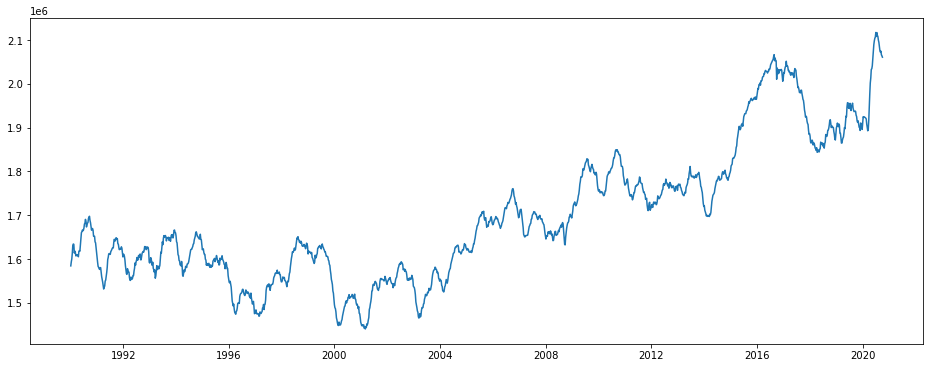

In [3]:
desc = ''
daily_production = EIA_Series('Weekly Stocks','PET.WTTSTUS1.W')
prod_feat = Dataset(daily_production.series_frame)
prod_feat['Weekly Stocks'].show_report()

dep.ingest(daily_production)

In [4]:
dep.originals

,Daily Price,Weekly Stocks
Date,,
1986-01-02,25.56,NaN
1986-01-03,26.00,NaN
1986-01-06,26.53,NaN
1986-01-07,25.85,NaN
1986-01-08,25.87,NaN
...,...,...
2020-09-30,40.05,2064262.0
2020-10-01,38.51,2064262.0
2020-10-02,36.90,2061140.0


Length                                  1207
Values                                  1207
Missing                              0(0.0)%
Unique                                  1194
Earliest Point           1920-01-01 00:00:00
Latest Point             2020-07-01 00:00:00
Possibly Categorical?                     No
dtype: object

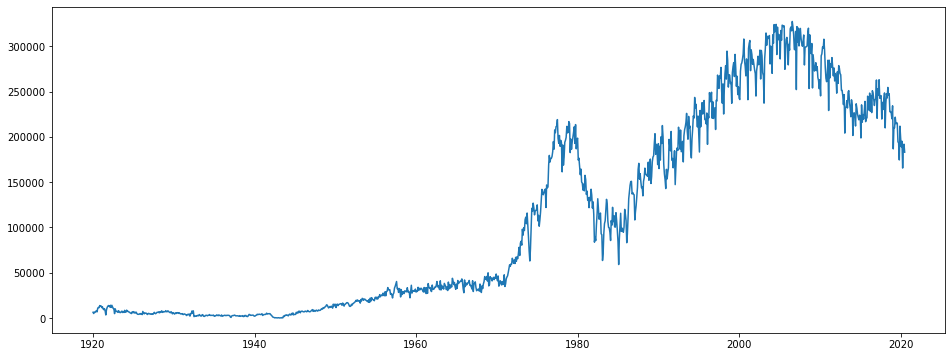

In [5]:
desc = 'US imports of crude oil, monthly'

monthly_imports = EIA_Series('Monthly Imports','PET.MCRIMUS1.M',desc,date_format='%Y%m' )
import_feat = Dataset(monthly_imports.series_frame)
import_feat['Monthly Imports'].show_report()
dep.ingest(monthly_imports)

In [17]:
ds = Dataset(dep.originals)

Length                                  8772
Values                                  8772
Missing                              0(0.0)%
Unique                                   415
Earliest Point           1986-01-02 00:00:00
Latest Point             2020-10-06 00:00:00
Possibly Categorical?                    Yes
dtype: object

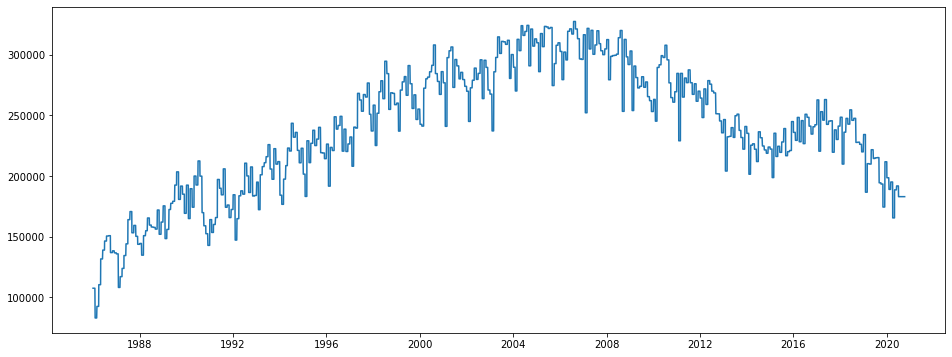

In [18]:
ds['Monthly Imports'].show_report()

## Dow Jones

In [ ]:
df_dow = pd.read_csv('data/dji.csv')

df_dow['Date']=pd.to_datetime(df_dow['Date'])
        
df_dow.set_index(df_dow['Date'],drop=True,inplace=True)

In [ ]:
df_dow['Close'].plot()

In [ ]:
df_dow['delta_dow']  = df_dow['Close'].diff()

X = df_dow[['delta_dow']]

y = daily_price.series_frame[['deltaDaily Price']]

merged = y.merge(X,how='inner',left_index=True,right_index=True)

In [ ]:
merged.head()

In [ ]:
x=merged['deltaDaily Price']
y=merged['delta_dow']
plt.scatter(x=x,y=y)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

model= LinearRegression()

In [ ]:
model.fit(x.reshape(-1,1),y)

# To-Do

1. Moving averages?
2. Correlation between price and:
3. Features to add/explore:
    a. Active wells?
    b. Refinery inputs?
    c. consumption?
    d. month?
    e. 
    


# SCRAPS

In [ ]:
\
df_eia=functools.reduce(lambda x,y: x.join(y,how='outer'),frame_list)
df_eia.fillna(axis=0,method='ffill',inplace=True)

conn = sqlite3.connect('oilstocks.db')
c = conn.cursor()

for col in df_eia:
    df_eia[col]=preprocessing.scale(df_eia[col])

df_eia.to_sql("scaledstocks",conn,if_exists='replace')
conn.commit()

df_eia.to_sql("crudestocks",conn,if_exists='replace')